#Recurrent Neural Networks part. 2

#Question-Answering Model:

Source: https://huggingface.co/deepset/roberta-base-squad2

In [ ]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

model_name = "deepset/roberta-base-squad2"

# a) Get predictions
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)
QA_input = {
    'question': 'Why is model conversion important?',
    'context': 'The option to convert models between FARM and transformers gives freedom to the user and let people easily switch between frameworks.'
}
res = nlp(QA_input)

# b) Load model & tokenizer
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [ ]:
res

{'score': 0.21171429753303528,
 'start': 59,
 'end': 84,
 'answer': 'gives freedom to the user'}

In [ ]:
QA_input = {
    'question': 'Why am I happy?',
    'context': 'I am happy because I have achieved good scores in my college subjects'
}
res = nlp(QA_input)
res

{'score': 0.45052337646484375,
 'start': 19,
 'end': 69,
 'answer': 'I have achieved good scores in my college subjects'}

In [ ]:
QA_input = {
    'question': 'Why are the programs and courses important?',
    'context': 'At HBS, real-world leadership challenges come to life. Our programs and courses will help you learn how to think expansively, act decisively, and inspire those around you to achieve great things.'
}
res = nlp(QA_input)
res

{'score': 0.015917422249913216,
 'start': 85,
 'end': 124,
 'answer': 'help you learn how to think expansively'}

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

nlp_spanish = pipeline("question-answering", model="MMG/bert-base-spanish-wwm-cased-finetuned-spa-squad2-es-finetuned-sqac", tokenizer="MMG/bert-base-spanish-wwm-cased-finetuned-spa-squad2-es-finetuned-sqac")

config.json:   0%|          | 0.00/703 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/437M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/481k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
QA_input = {
    'question': '¿Con qué contamos?',
    'context': 'Contamos con docentes especializados y la última tecnología para que transformes tu vida para siempre.'
}
res = nlp(QA_input)

In [ ]:
res

{'score': 0.08999419212341309,
 'start': 13,
 'end': 36,
 'answer': 'docentes especializados'}

In [ ]:
QA_input = {
    'question': '¿Cuántos convenios especializados tiene?',
    'context': """
¡Te acompañamos a alcanzar tus sueños con oportunidades internacionales!
+ 500 convenios internacionales
Becas de intercambio con las mejores universidades del mundo.
Clases espejo, movilidad estudiantil, misiones académicas y muchas oportunidades más.
    """
}
res = nlp(QA_input)

In [ ]:
res

{'score': 0.020826423540711403, 'start': 75, 'end': 81, 'answer': '\n+ 500'}

#Image-to-text

Source: https://huggingface.co/microsoft/trocr-base-handwritten

In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

# load image from the IAM database
url = 'https://fki.tic.heia-fr.ch/static/img/a01-122-02-00.jpg'
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')
pixel_values = processor(images=image, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1141: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
generated_text

'indus the'

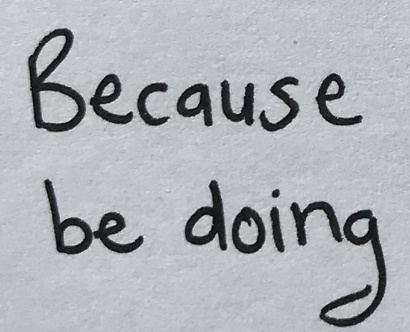

In [ ]:
# load image from the IAM database
url = 'https://global.discourse-cdn.com/uipath/original/3X/b/9/b9afd24d812a6d61769845416f139efcd6042914.jpeg'
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
image

In [ ]:
pixel_values = processor(images=image, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

In [ ]:
generated_text

'becoming'

Source: https://huggingface.co/Salesforce/blip-image-captioning-large

In [ ]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

a photography of a woman and her dog on the beach
woman sitting on the beach with her dog and a cell phone


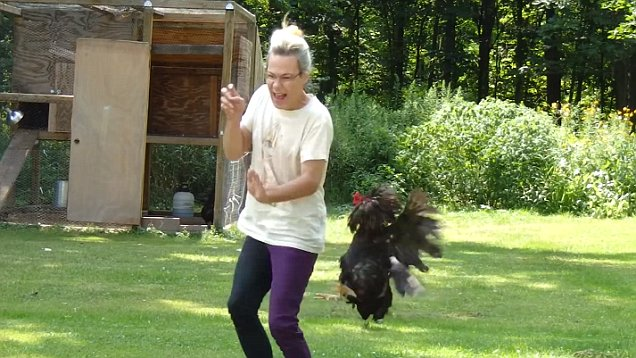

In [ ]:
img_url = 'https://i.dailymail.co.uk/i/pix/2015/05/21/15/28F1E3FC00000578-0-image-m-16_1432220322833.jpg'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
raw_image

In [ ]:
# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

a photography of a woman in a yard throwing a frisbee


In [ ]:
# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

woman in white shirt throwing a chicken in a yard


#Summarizer

Soure: https://huggingface.co/facebook/bart-large-cnn

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""
print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[{'summary_text': 'Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002. She is believed to still be married to four men.'}]


In [ ]:
ARTICLE = """In a world rife with conflict, few of us want to engage in more. But some situations come packaged with contention no matter how averse we are to it.
CEOs and their executive teams tackle fraught situations daily. Routine internal pressures have been exacerbated by recent macroeconomic scarcity, global conflict, and technological disruption, among other complications.
Ideally, executives don’t have to face these challenges alone. They have the support of their boards of directors. But the high stakes, the strong wills and
personalities of successful, high-powered people, and the heaps of uncertainty ensure that challenges at this level are accompanied by interpersonal conflict.
The backing of a board can help mobilize an organization to achieve its most ambitious aspirations, but a significant divergence of vision and values may lead
the board to stall progress on an organization’s highest priorities — and even unseat a CEO. Because contentions impact direction, strategy, and morale
organization-wide, it’s important to learn how to navigate conflict with the board. Leaders must proactively and productively make covert disagreements
overt and foster a healthy dialog. Otherwise, they may fall victim to decisions made outside the room and behind our backs.
Here are five strategies for navigating conflict with your board. """

print(summarizer(ARTICLE, max_length=130, min_length=50, do_sample=False))

[{'summary_text': 'CEOs and their executive teams tackle fraught situations daily. Routine internal pressures have been exacerbated by recent macroeconomic scarcity, global conflict, and technological disruption. Because contentions impact direction, strategy, and morale, it’s important to learn how to navigate conflict with the board.'}]


Source: https://huggingface.co/mrm8488/bert2bert_shared-spanish-finetuned-summarization

In [ ]:
ARTICLE = """Although exhaustive attempts were made to find publications
that dealt with GenAI and any matter relating to EMI HE, locatable specific studies in this vein or in proximate fields such as CLIL
HE were extremely scarce or non-existent at the time of writing.
This is to be expected given the nature of the phenomenon of focus
of the present study. Therefore, in order to obtain comparative
insights and offer correlative findings with clear application on
matters such as teaching and learning, assessment, and research,
amongst others from the wider context in which EMI HE finds
itself embedded, a number of studies have also been included
which relate to the academic subjects in HE which form such a
key component of the EMI educational phenomenon (Rose et al.,
2021). """

print(summarizer(ARTICLE, max_length=130, min_length=50, do_sample=False))

[{'summary_text': 'Efforts were made to find publications that dealt with GenAI and any matter relating to EMI HE. Specific studies in this vein or in proximate fields such as CLIL \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0HE were extremely scarce or non-existent at the time of writing. This is to be expected given the nature of the phenomenon of focus \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0of the present study.'}]


In [ ]:
import torch
from transformers import BertTokenizerFast, EncoderDecoderModel
device = 'cuda' if torch.cuda.is_available() else 'cpu'
ckpt = 'mrm8488/bert2bert_shared-spanish-finetuned-summarization'
tokenizer = BertTokenizerFast.from_pretrained(ckpt)
model = EncoderDecoderModel.from_pretrained(ckpt).to(device)

def generate_summary(text):

   inputs = tokenizer([text], padding="max_length", truncation=True, max_length=512, return_tensors="pt")
   input_ids = inputs.input_ids.to(device)
   attention_mask = inputs.attention_mask.to(device)
   output = model.generate(input_ids, attention_mask=attention_mask)
   return tokenizer.decode(output[0], skip_special_tokens=True)

text = """
Esta revisión sistemática examina la investigación más actual sobre inteligencia artificial (IA) generativa y sus implicaciones para la educación superior en contextos de inglés como medio de instrucción (EMI). El estudio aborda dos preguntas de investigación: (1) ¿Cuáles son los estudios relevantes para la educación superior (EMI) publicados hasta ahora, teniendo en cuenta los desarrollos más recientes de la IA generativa? y (2) ¿Qué áreas clave faltan por abordar actualmente en la literatura existente y necesitan una mayor exploración académica a este respecto en la investigación de la educación superior (EMI)? Los resultados revelan una falta de investigación sobre las implicaciones de la IA generativa en la educación superior, con un número limitado de trabajos relevantes. El estudio ofrece sugerencias preliminares para guiar la investigación futura en este campo. La revisión destaca la necesidad de más investigación sobre el potencial de la IA generativa para mejorar la experiencia de enseñanza y aprendizaje en contextos de educación superior en los que se emplea el inglés como medio de instrucción, y proporciona una base teórica para futuros estudios. Los resultados podrían ser de utilidad para académicos y educadores universitarios que busquen explorar el uso de la IA generativa desde diferentes perspectivas educativas.
"""
generate_summary(text)

tokenizer_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.51k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/555M [00:00<?, ?B/s]

The following encoder weights were not tied to the decoder ['bert/pooler']
The following encoder weights were not tied to the decoder ['bert/pooler']
The following encoder weights were not tied to the decoder ['bert/pooler']
The following encoder weights were not tied to the decoder ['bert/pooler']


'La revisión sistemática analiza la investigación más actual sobre la IA generativa en la educación superior'

#Sentence Transformer:

Source: https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for
sentences = ['This is an example sentence', 'Each sentence is converted']

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

print("Sentence embeddings:")
print(sentence_embeddings)

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Sentence embeddings:
tensor([[ 6.7657e-02,  6.3496e-02,  4.8713e-02,  7.9305e-02,  3.7448e-02,
          2.6528e-03,  3.9375e-02, -7.0984e-03,  5.9361e-02,  3.1537e-02,
          6.0098e-02, -5.2905e-02,  4.0607e-02, -2.5931e-02,  2.9843e-02,
          1.1269e-03,  7.3515e-02, -5.0382e-02, -1.2239e-01,  2.3703e-02,
          2.9727e-02,  4.2477e-02,  2.5634e-02,  1.9952e-03, -5.6919e-02,
         -2.7160e-02, -3.2904e-02,  6.6025e-02,  1.1901e-01, -4.5879e-02,
         -7.2621e-02, -3.2584e-02,  5.2341e-02,  4.5055e-02,  8.2530e-03,
          3.6702e-02, -1.3942e-02,  6.5392e-02, -2.6427e-02,  2.0635e-04,
         -1.3664e-02, -3.6281e-02, -1.9504e-02, -2.8974e-02,  3.9427e-02,
         -8.8409e-02,  2.6242e-03,  1.3671e-02,  4.8306e-02, -3.1157e-02,
         -1.1733e-01, -5.1169e-02, -8.8529e-02, -2.1896e-02,  1.4299e-02,
          4.4417e-02, -1.3482e-02,  7.4339e-02,  2.6638e-02, -1.9876e-02,
          1.7919e-02, -1.0605e-02, -9.0426e-02,  2.1327e-02,  1.4120e-01,
         -6.4718e

Source: https://huggingface.co/Alibaba-NLP/gte-Qwen1.5-7B-instruct

In [ ]:
# Requires transformers>=4.36.0

import torch.nn.functional as F
from transformers import AutoModel, AutoTokenizer

input_texts = [
    "what is the capital of China?",
    "how to implement quick sort in python?",
    "Beijing",
    "sorting algorithms"
]

model_path = 'Alibaba-NLP/gte-large-en-v1.5'
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModel.from_pretrained(model_path, trust_remote_code=True)

# Tokenize the input texts
batch_dict = tokenizer(input_texts, max_length=8192, padding=True, truncation=True, return_tensors='pt')

outputs = model(**batch_dict)
embeddings = outputs.last_hidden_state[:, 0]

# (Optionally) normalize embeddings
embeddings = F.normalize(embeddings, p=2, dim=1)
scores = (embeddings[:1] @ embeddings[1:].T) * 100
print(scores.tolist())

tokenizer_config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

configuration.py:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- configuration.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling.py:   0%|          | 0.00/57.3k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- modeling.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/1.74G [00:01<?, ?B/s]

[[41.8635368347168, 77.07077026367188, 37.02983093261719]]


#LayoutLMv3

Source: https://huggingface.co/docs/transformers/main/en/model_doc/layoutlmv3#transformers.LayoutLMv3ForTokenClassification

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
from transformers import AutoProcessor, AutoModelForTokenClassification
from datasets import load_dataset

processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)
model = AutoModelForTokenClassification.from_pretrained("microsoft/layoutlmv3-base", num_labels=7)

dataset = load_dataset("nielsr/funsd-layoutlmv3", split="train")
example = dataset[0]
image = example["image"]
words = example["tokens"]
boxes = example["bboxes"]
word_labels = example["ner_tags"]

encoding = processor(image, words, boxes=boxes, word_labels=word_labels, return_tensors="pt")

outputs = model(**encoding)
loss = outputs.loss
logits = outputs.logits

Exception ignored in: <function _xla_gc_callback at 0x7d5c023f44c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/275 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Generating train split:   0%|          | 0/149 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:1051: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [ ]:
outputs

TokenClassifierOutput(loss=tensor(2.0566, grad_fn=<NllLossBackward0>), logits=tensor([[[ 0.0873,  0.3005, -0.3789,  ..., -0.0612,  0.1000,  0.3658],
         [-0.3761,  0.2559,  0.0477,  ..., -0.3856,  0.2693,  0.0927],
         [-0.4654,  0.0914, -0.0417,  ..., -0.5782,  0.3959, -0.1700],
         ...,
         [-0.0204,  0.0273,  0.5484,  ..., -0.4763,  0.3248,  0.6061],
         [-0.0070, -0.2888,  0.4385,  ..., -0.4890, -0.0643,  0.0161],
         [ 0.0853,  0.3013, -0.3778,  ..., -0.0624,  0.0999,  0.3703]]],
       grad_fn=<ViewBackward0>), hidden_states=None, attentions=None)